# **Pembelajaran Mesin H**
### **Muhammad Aqil Farrukh / 502522158**
### **Tugas 3 Hierarchical Clustering**


1. Mensuppress Warnings: Kode pertama mendefinisikan sebuah fungsi warn() yang tidak melakukan apa-apa (pass). Kemudian, modul warnings diimpor, dan fungsi warn() yang telah didefinisikan sebelumnya digunakan untuk menggantikan fungsi warn bawaan dari modul tersebut. Hal ini dimaksudkan untuk menonaktifkan atau menyuppress pesan peringatan yang mungkin muncul selama eksekusi kode.

2. Import Libraries: Kode tersebut mengimpor beberapa library yang umum digunakan dalam analisis data dan pembelajaran mesin, termasuk:

* random: Untuk menghasilkan bilangan acak.
* numpy (diimpor sebagai np): Library yang digunakan untuk operasi numerik dan array.
* pandas (diimpor sebagai pd): Library yang digunakan untuk  manipulasi dan analisis data.
* matplotlib.pyplot (diimpor sebagai plt): Library yang digunakan untuk membuat visualisasi data.
* sklearn.cluster.KMeans: Kelas yang digunakan untuk melakukan klasterisasi dengan metode K-Means.
* sklearn.datasets.make_blobs: Fungsi yang digunakan untuk membuat dataset berbentuk blob (bercak) dengan berbagai properti tertentu.
3.  Inline Plotting: %matplotlib inline adalah sebuah magic command yang digunakan dalam lingkungan Jupyter Notebook atau IPython untuk menampilkan plot matplotlib di dalam notebook secara langsung setelah kode.

Dengan demikian, keseluruhan kode tersebut persiapan awal untuk melakukan analisis data dan klasterisasi dengan menggunakan K-Means, serta menampilkan visualisasi hasilnya di dalam notebook.`

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

### **Menggunakan dataset personality customer, dilakukan data preprocessing, EDA, dan K-Means Clustering, lalu analisis hasil K-Means**

In [2]:

dataF = pd.read_csv('marketing_campaign.csv',delimiter='\t')
dataF.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Baris kode dataF = pd.read_csv('marketing_campaing.csv') digunakan untuk membaca file CSV yang disebut 'marketing_campaing.csv' ke dalam sebuah DataFrame menggunakan fungsi read_csv dari modul pandas.

Kemudian, dataF.head() digunakan untuk menampilkan lima baris pertama dari DataFrame dataF.

Jadi, dengan menggunakan kode ini, kita mengimpor data dari file CSV ke dalam sebuah DataFrame dan kemudian menampilkan lima baris pertama dari DataFrame tersebut.

In [3]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Fungsi dataF.info() memberikan ringkasan singkat tentang struktur dan informasi dari DataFrame dataF. Ini mencakup beberapa informasi penting seperti:

Jumlah total baris (entries) dalam DataFrame.
Jumlah kolom (columns) dalam DataFrame.
Daftar nama kolom beserta tipe data masing-masing kolom.
Jumlah nilai non-null (non-missing) dalam setiap kolom.
Penggunaan memori oleh DataFrame.
Dengan menjalankan dataF.info(), kita akan mendapatkan pemahaman yang lebih baik tentang struktur dan isi dari DataFrame dataF, termasuk apakah terdapat nilai yang hilang (missing values) dalam dataset dan tipe data dari setiap kolomnya.

In [4]:
dataF.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


Kemudian panggilan dataF.describe(include='all') memberikan ringkasan statistik deskriptif dari DataFrame dataF, termasuk kolom-kolom dengan tipe data numerik dan kategorikal. Ini mencakup informasi seperti:

* Count: Jumlah entri non-null (non-missing) untuk setiap kolom.
* Mean: Rata-rata nilai untuk setiap kolom.
* Std: Standar deviasi dari nilai untuk setiap kolom.
* Min: Nilai minimum untuk setiap kolom.
* 25th, 50th, 75th percentile: Kuartil ke-25, ke-50 (median), dan ke-75 untuk setiap kolom.
* Max: Nilai maksimum untuk setiap kolom.

In [5]:
dataF.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Panggilan dataF.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame dataF.

Misalnya, jika sebuah kolom memiliki nilai null, jumlahnya akan dihitung dan ditampilkan. Jika sebuah kolom tidak memiliki nilai null, maka jumlahnya akan nol.

In [6]:
dataF.duplicated().sum()

0

**Penjelasan Tentang Atribut Data**

Atribut Numerik:
1. Year_Birth: Tahun kelahiran pelanggan.
2. Income: Pendapatan tahunan pelanggan.
3. Kidhome: Jumlah anak di bawah usia 18 tahun di rumah tangga pelanggan.
4. Teenhome: Jumlah remaja di rumah tangga pelanggan.
5. Recency: Jumlah hari sejak pelanggan melakukan pembelian terakhir.
6. MntWines: Jumlah uang yang dihabiskan pelanggan untuk pembelian anggur.
7. MntFruits: Jumlah uang yang dihabiskan pelanggan untuk pembelian buah-buahan.
8. MntMeatProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk daging.
9. MntFishProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk ikan.
10. MntSweetProducts: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk manis.
11. MntGoldProds: Jumlah uang yang dihabiskan pelanggan untuk pembelian produk emas.
12. NumDealsPurchases: Jumlah pembelian dengan diskon yang dilakukan pelanggan.
13. NumWebPurchases: Jumlah pembelian yang dilakukan pelanggan melalui website.
14. NumCatalogPurchases: Jumlah pembelian yang dilakukan pelanggan melalui katalog.
15. NumStorePurchases: Jumlah pembelian yang dilakukan pelanggan melalui toko fisik.
16. NumWebVisitsMonth: Jumlah kunjungan pelanggan ke website per bulan.
17. AcceptedCmp3: Apakah pelanggan menerima penawaran kampanye 3.
18. AcceptedCmp4: Apakah pelanggan menerima penawaran kampanye 4.
19. AcceptedCmp5: Apakah pelanggan menerima penawaran kampanye 5.
20. AcceptedCmp1: Apakah pelanggan menerima penawaran kampanye 1.
21. AcceptedCmp2: Apakah pelanggan menerima penawaran kampanye 2.
22. Complain: Apakah pelanggan mengajukan keluhan.
23. Z_CostContact: Biaya kontak.
24. Z_Revenue: Pendapatan dari pelanggan.

Atribut Kategorikal:
1. Education: Tingkat pendidikan pelanggan.
2. Marital_Status: Status perkawinan pelanggan.
3. Dt_Customer: Tanggal pelanggan bergabung.
4. Response: Respon pelanggan terhadap kampanye pemasaran.

**Permasalahan yang Terdapat pada Data:**

1. Terdapat banyak kolom, baik numerik maupun kategorikal, yang memiliki nilai null.
2. Beberapa atribut mungkin tidak relevan atau tidak akan digunakan dalam Analisis Eksplorasi Data (EDA) dan Klasterisasi K-Means.


### **PRE PROCESSING**

Preprocessing data adalah proses persiapan data sebelum dilakukan analisis lebih lanjut. Tujuan dari preprocessing data adalah untuk membersihkan, menormalkan, dan mempersiapkan data agar dapat digunakan secara efektif dalam model atau algoritma machine learning.

 **Data Reduction**: Tahap ini melibatkan pengurangan dimensi data untuk mengurangi kompleksitas dan mempercepat proses analisis atau model. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Principal Component Analysis (PCA): Mengurangi dimensi data dengan menggabungkan fitur-fitur yang saling berkorelasi.
   - Feature Extraction: Mengubah data menjadi representasi yang lebih sederhana dan informatif, seperti menggunakan metode seperti t-SNE atau LDA.



In [7]:
dataF['total_spend_product'] = dataF['MntWines'] + dataF['MntFruits'] + dataF['MntMeatProducts'] + dataF['MntFishProducts'] + dataF['MntSweetProducts'] + dataF['MntGoldProds']
dataF['total_spend_place'] = dataF['NumDealsPurchases'] + dataF['NumWebPurchases'] + dataF['NumCatalogPurchases'] + dataF['NumStorePurchases']
dataF['Rata-rata-belanja'] = round(dataF['total_spend_product'] / dataF['total_spend_place'],2)
dataF

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_spend_product,total_spend_place,Rata-rata-belanja
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,25,64.68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,6,4.50
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,21,36.95
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,8,6.62
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,19,22.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,1341,18,74.50
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,444,22,20.18
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,1241,19,65.32
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,843,23,36.65


1. `dataF['total_spend_product'] = dataF['MntWines'] + dataF['MntFruits'] + dataF['MntMeatProducts'] + dataF['MntFishProducts'] + dataF['MntSweetProducts'] + dataF['MntGoldProds']`: Pada baris ini,   membuat kolom baru dalam DataFrame `dataF` yang disebut `'total_spend_product'`. Kolom ini berisi total belanja produk dari kolom-kolom `'MntWines'`, `'MntFruits'`, `'MntMeatProducts'`, `'MntFishProducts'`, `'MntSweetProducts'`, dan `'MntGoldProds'`. Total belanja produk dihitung dengan menambahkan nilai belanja dari setiap kolom produk.

2. `dataF['total_spend_place'] = dataF['NumDealsPurchases'] + dataF['NumWebPurchases'] + dataF['NumCatalogPurchases'] + dataF['NumStorePurchases']`: Pada baris ini,   membuat kolom baru dalam DataFrame `dataF` yang disebut `'total_spend_place'`. Kolom ini berisi total belanja di tempat dari kolom-kolom `'NumDealsPurchases'`, `'NumWebPurchases'`, `'NumCatalogPurchases'`, dan `'NumStorePurchases'`. Total belanja di tempat dihitung dengan menambahkan nilai belanja dari setiap kolom tempat.

3. `dataF['Rata-rata-belanja'] = round(dataF['total_spend_product'] / dataF['total_spend_place'],2)`: Pada baris ini,   membuat kolom baru dalam DataFrame `dataF` yang disebut `'Rata-rata-belanja'`. Kolom ini berisi rata-rata belanja per tempat. Rata-rata belanja dihitung dengan membagi total belanja produk (kolom `'total_spend_product'`) dengan total belanja di tempat (kolom `'total_spend_place'`), dan hasilnya dibulatkan menjadi 2 angka desimal.

Dengan demikian, setelah menjalankan baris-baris kode di atas, DataFrame `dataF` akan memiliki tiga kolom baru: `'total_spend_product'`, `'total_spend_place'`, dan `'Rata-rata-belanja'`, yang masing-masing berisi total belanja produk, total belanja di tempat, dan rata-rata belanja per tempat.

**Data Cleaning**: Tahap ini melibatkan identifikasi dan penanganan masalah yang umum terjadi dalam data, seperti nilai yang hilang, data duplikat, format yang tidak tepat, dan outlier. Beberapa teknik yang dapat digunakan dalam tahap ini antara lain:
   - Menghapus baris atau kolom yang mengandung nilai yang hilang.
   - Mengisi nilai yang hilang dengan nilai rata-rata, median, atau modus.
   - Menghapus data duplikat.
   - Mendeteksi dan menangani outlier.

In [8]:
df = dataF[['Income','total_spend_place','Rata-rata-belanja']]
df['Rata-rata-belanja'] = df['Rata-rata-belanja'].replace(np.inf, np.nan)

Pada kode di atas, saya membuat DataFrame baru yang disebut `df`, yang berisi kolom `'Income'`, `'total_spend_place'`, dan `'Rata-rata-belanja'` dari DataFrame `dataF`. Kemudian, saya melakukan penggantian nilai infiniti (`np.inf`) dalam kolom `'Rata-rata-belanja'` dengan nilai NaN (`np.nan`). Ini dilakukan dengan menggunakan fungsi `replace` dari Pandas.

Penggantian ini biasanya dilakukan ketika terdapat hasil pembagian oleh nol, yang menghasilkan nilai infiniti. Dengan menggantinya dengan nilai NaN, ini memungkinkan untuk melakukan pemrosesan data lebih lanjut, seperti penghapusan baris yang mengandung nilai NaN atau pengisian nilai NaN dengan nilai lainnya.

In [9]:
df.isnull().sum()

Income               24
total_spend_place     0
Rata-rata-belanja     4
dtype: int64

Perintah `df.isnull().sum()` digunakan untuk menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame `df`. Ini akan memberikan output berupa jumlah nilai NaN dalam setiap kolom.

Saya dapat menjalankan perintah tersebut untuk mengetahui berapa banyak nilai NaN yang ada dalam DataFrame `df`. Misalnya:

```python
print(df.isnull().sum())
```

Dari output nya dapat diketahui bahwa Income masih memiliki 24 nilai nan atau kosong

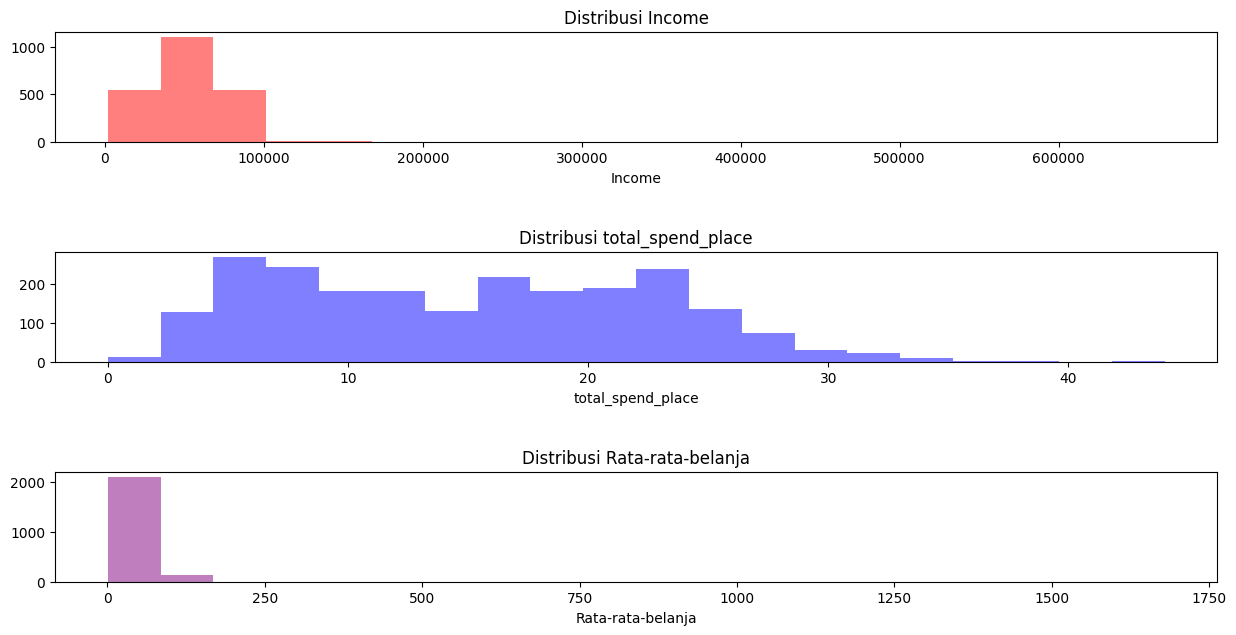

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['Income'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Income')
plt.xlabel('Income')

plt.subplot(4, 1, 2)
plt.hist(df['total_spend_place'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi total_spend_place')
plt.xlabel('total_spend_place')

plt.subplot(4, 1, 3)
plt.hist(df['Rata-rata-belanja'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Rata-rata-belanja')
plt.xlabel('Rata-rata-belanja')

plt.subplots_adjust(hspace=1)  # Menambahkan jarak antar subplot secara vertikal

plt.show()


Pada kode di atas, saya menggunakan matplotlib untuk membuat subplot dengan tiga histogram yang menampilkan distribusi kolom 'Income', 'total_spend_place', dan 'Rata-rata-belanja' dari DataFrame `df`.

- Pertama, saya membuat sebuah figure dengan ukuran 15x10 menggunakan `plt.figure(figsize=(15, 10))`.
- Kemudian, saya menggunakan subplot untuk menempatkan tiga histogram secara vertikal. 
- Di setiap subplot, saya menggunakan `plt.hist()` untuk membuat histogram dari kolom yang sesuai. Saya menggunakan `dropna()` untuk menghapus nilai NaN sebelum membuat histogram. 
- Saya menggunakan `bins=20` untuk menentukan jumlah bin yang digunakan dalam histogram.
- Saya memberikan judul pada setiap subplot dengan menggunakan `plt.title()` dan menamai sumbu x dengan menggunakan `plt.xlabel()`.

Dengan menggunakan kode di atas, saya telah membuat tiga histogram yang menunjukkan distribusi dari kolom 'Income', 'total_spend_place', dan 'Rata-rata-belanja'. Setiap histogram ditempatkan dalam subplot yang berbeda secara vertikal.

Dan dapat diketahui dari output bahwa 
- Nilai Income tidak tersebar dengan rata , dan hanya ada data di bagian kiri saja sehingga pemerataan data paling cocok menggunakan mean atau rata rata
- Nilai total_spend_place memiliki persebaran yang ada di tengah dan hampir merata, maka yang paling cocok adalah median
- Nilai Rata-rata belanja tidak tersebar dengan rata , dan hanya ada data di bagian kiri saja sehingga pemerataan data paling cocok menggunakan mean atau rata rata



In [11]:
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['total_spend_place'].fillna(df['total_spend_place'].median(), inplace=True)
df['Rata-rata-belanja'].fillna(df['Rata-rata-belanja'].mean(), inplace=True)
df.isnull().sum()

Income               0
total_spend_place    0
Rata-rata-belanja    0
dtype: int64

Pada kode di atas, saya melakukan pengisian nilai yang hilang (NaN) dalam kolom 'Income', 'total_spend_place', dan 'Rata-rata-belanja' dengan nilai rata-rata atau median dari kolom tersebut.

Berikut penjelasan langkah-langkahnya:

1. `df['Income'].fillna(df['Income'].mean(), inplace=True)`: Saya mengisi nilai NaN dalam kolom 'Income' dengan nilai rata-rata dari kolom tersebut menggunakan metode `.fillna()` dan `.mean()`. Dengan `inplace=True`, perubahan akan diterapkan langsung ke DataFrame `df`.

2. `df['total_spend_place'].fillna(df['total_spend_place'].median(), inplace=True)`: Saya mengisi nilai NaN dalam kolom 'total_spend_place' dengan nilai median dari kolom tersebut menggunakan metode `.fillna()` dan `.median()`. Kembali, `inplace=True` digunakan untuk menerapkan perubahan langsung ke DataFrame `df`.

3. `df['Rata-rata-belanja'].fillna(df['Rata-rata-belanja'].mean(), inplace=True)`: Saya mengisi nilai NaN dalam kolom 'Rata-rata-belanja' dengan nilai rata-rata dari kolom tersebut menggunakan metode `.fillna()` dan `.mean()`. Seperti sebelumnya, `inplace=True` digunakan untuk menerapkan perubahan langsung ke DataFrame `df`.

4. `df.isnull().sum()`: Terakhir, saya menggunakan `.isnull().sum()` untuk memeriksa apakah masih ada nilai NaN dalam DataFrame `df` setelah pengisian nilai. Ini akan memberikan output berupa jumlah nilai NaN dalam setiap kolom DataFrame.

Dengan menggunakan langkah-langkah di atas, saya berhasil mengisi nilai yang hilang dalam DataFrame `df` dan memeriksa apakah masih ada nilai NaN yang tersisa.

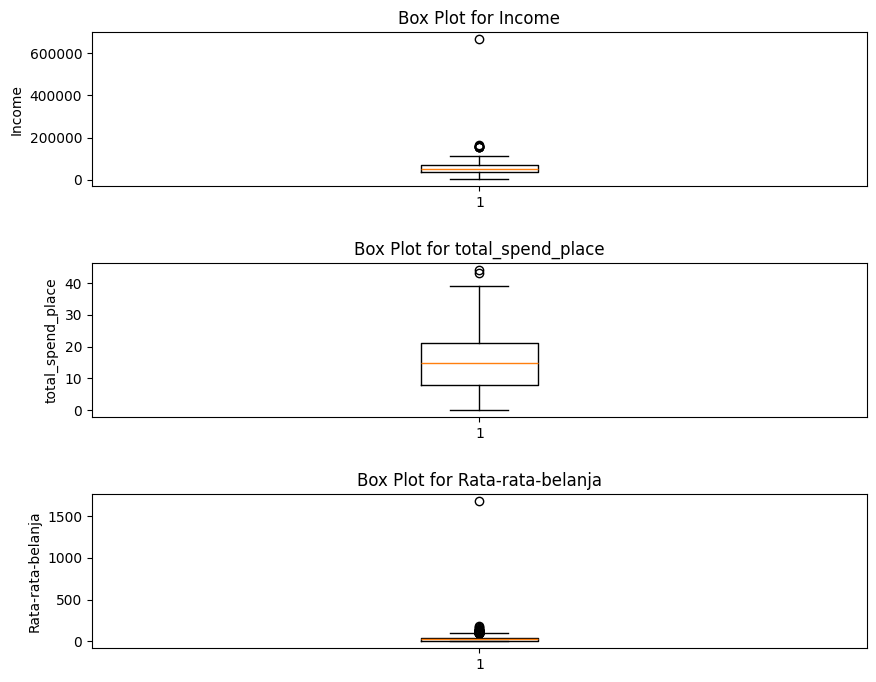

In [12]:
from scipy import stats
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df):
    axes[i].boxplot(df[column])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

Pada kode di atas, saya menggunakan library `scipy.stats` untuk mengimport fungsi `boxplot`, dan kemudian membuat subplots berdasarkan kolom dalam DataFrame `df` menggunakan `plt.subplots()`.

Berikut penjelasan langkah-langkahnya:

1. Saya menggunakan `plt.subplots(nrows=3, ncols=1, figsize=(10, 8))` untuk membuat tiga subplot secara vertikal dengan satu kolom. Ukuran figur ditetapkan menjadi (10, 8) dengan `figsize=(10, 8)` dan mengatur jarak antar subplot menggunakan `fig.subplots_adjust(hspace=0.5)`.

2. Melalui loop `for`, saya melakukan iterasi melalui setiap kolom dalam DataFrame `df` dan membuat boxplot untuk setiap kolom menggunakan `axes[i].boxplot(df[column])`. Di sini, `i` adalah indeks subplot yang sesuai dengan kolom saat ini.

3. Saya menambahkan judul untuk setiap subplot dengan menggunakan `axes[i].set_title(f'Box Plot for {column}')`, di mana `{column}` adalah nama kolom yang sedang diproses.

4. Saya menambahkan label sumbu y untuk setiap subplot dengan menggunakan `axes[i].set_ylabel(column)`, di mana `column` adalah nama kolom yang sedang diproses.

5. Terakhir, saya menampilkan plot menggunakan `plt.show()`.

Dengan menggunakan langkah-langkah di atas, saya berhasil membuat boxplot untuk setiap kolom dalam DataFrame `df`. Boxplot digunakan untuk menunjukkan distribusi data dan mendeteksi keberadaan outlier. Outlier adalah nilai-nilai yang jauh dari kebanyakan data dan bisa menjadi indikasi anomali atau kesalahan pengukuran. Dengan melihat boxplot, kita dapat mengidentifikasi potensi outlier dalam data dan mempertimbangkan tindakan yang tepat untuk mengatasi mereka.

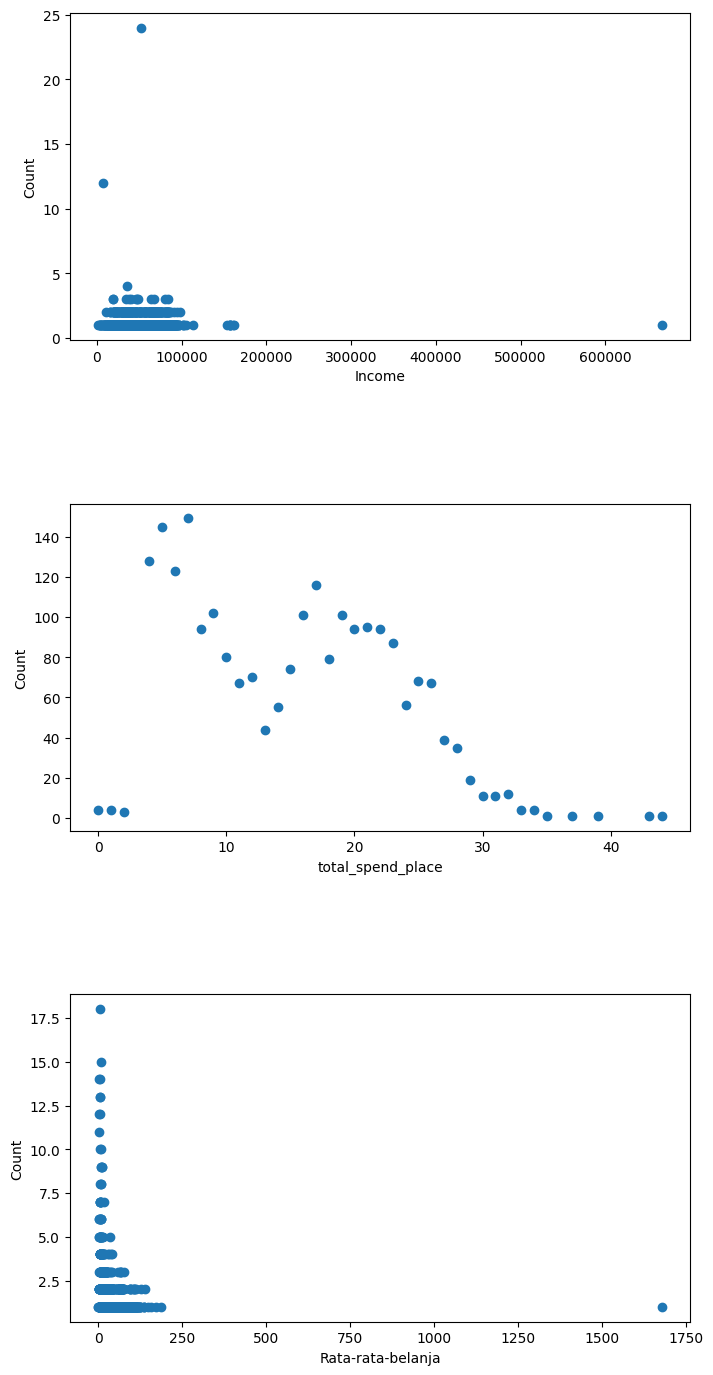

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(df):
    counts = df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

Pada kode di atas, saya menggunakan `plt.subplots()` untuk membuat tiga subplot secara vertikal dengan satu kolom. Ukuran figur ditetapkan menjadi (8, 17) dengan `figsize=(8, 17)` dan mengatur jarak antar subplot menggunakan `fig.subplots_adjust(hspace=0.5, wspace=0.6)`.

Berikut adalah penjelasan lebih lanjut:

1. Melalui loop `for`, saya melakukan iterasi melalui setiap kolom dalam DataFrame `df`.
   
2. Di dalam loop, saya menggunakan `df[col].value_counts()` untuk menghitung frekuensi kemunculan setiap nilai dalam kolom tersebut.

3. Saya menggunakan `axes[i].scatter(counts.index, counts.values)` untuk membuat scatter plot dari nilai-nilai dan frekuensinya. `counts.index` adalah nilai-nilai unik dalam kolom, sedangkan `counts.values` adalah frekuensi kemunculan masing-masing nilai.

4. Saya menambahkan label sumbu x untuk setiap subplot dengan menggunakan `axes[i].set_xlabel(f'{col}')`, di mana `{col}` adalah nama kolom yang sedang diproses.

5. Saya menambahkan label sumbu y untuk setiap subplot dengan menggunakan `axes[i].set_ylabel('Count')`.

6. Terakhir, saya menampilkan plot menggunakan `plt.show()`.

Dengan menggunakan langkah-langkah di atas, saya berhasil membuat scatter plot yang menunjukkan frekuensi kemunculan setiap nilai dalam setiap kolom DataFrame `df`. Scatter plot ini membantu kita memvisualisasikan distribusi nilai-nilai dalam setiap kolom.

In [14]:
from scipy import stats

z_scores = stats.zscore(df)
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.shape

(2224, 3)

Pada kode di atas, saya menggunakan modul `scipy.stats` untuk menghitung skor Z dari setiap data dalam DataFrame `df`.

Berikut adalah penjelasan langkah-langkahnya:

1. `z_scores = stats.zscore(df)`: Saya menggunakan fungsi `zscore()` dari modul `scipy.stats` untuk menghitung skor Z dari setiap data dalam DataFrame `df`. Skor Z adalah ukuran seberapa jauh sebuah titik data dari rata-rata dalam satuan deviasi standar.

2. `clean_df = df[(z_scores < 2.5).all(axis=1)]`: Saya membuat DataFrame baru yang disebut `clean_df` yang hanya berisi baris-baris dari DataFrame `df` di mana semua nilai skor Z dalam baris tersebut kurang dari 2.5. Ini dilakukan dengan menggunakan ekspresi boolean `(z_scores < 2.5).all(axis=1)` untuk memeriksa apakah semua nilai skor Z dalam setiap baris kurang dari 2.5. `all(axis=1)` menjamin bahwa semua elemen dalam setiap baris memenuhi kondisi yang ditetapkan.

3. `clean_df.shape`: Saya menggunakan atribut `shape` untuk menghitung jumlah baris dan kolom dalam DataFrame `clean_df`. Ini memberikan output berupa tuple yang menunjukkan jumlah baris dan kolom dalam DataFrame yang telah dibersihkan.

Dengan langkah-langkah di atas, saya telah membersihkan DataFrame `df` dari nilai-nilai yang dianggap sebagai outlier berdasarkan skor Z dengan batas 2.5. DataFrame yang telah dibersihkan disimpan dalam `clean_df`.

### Dan berikut adalah hasil visualisasi data setelah di cleaning yang meliputi pembersihan outlier

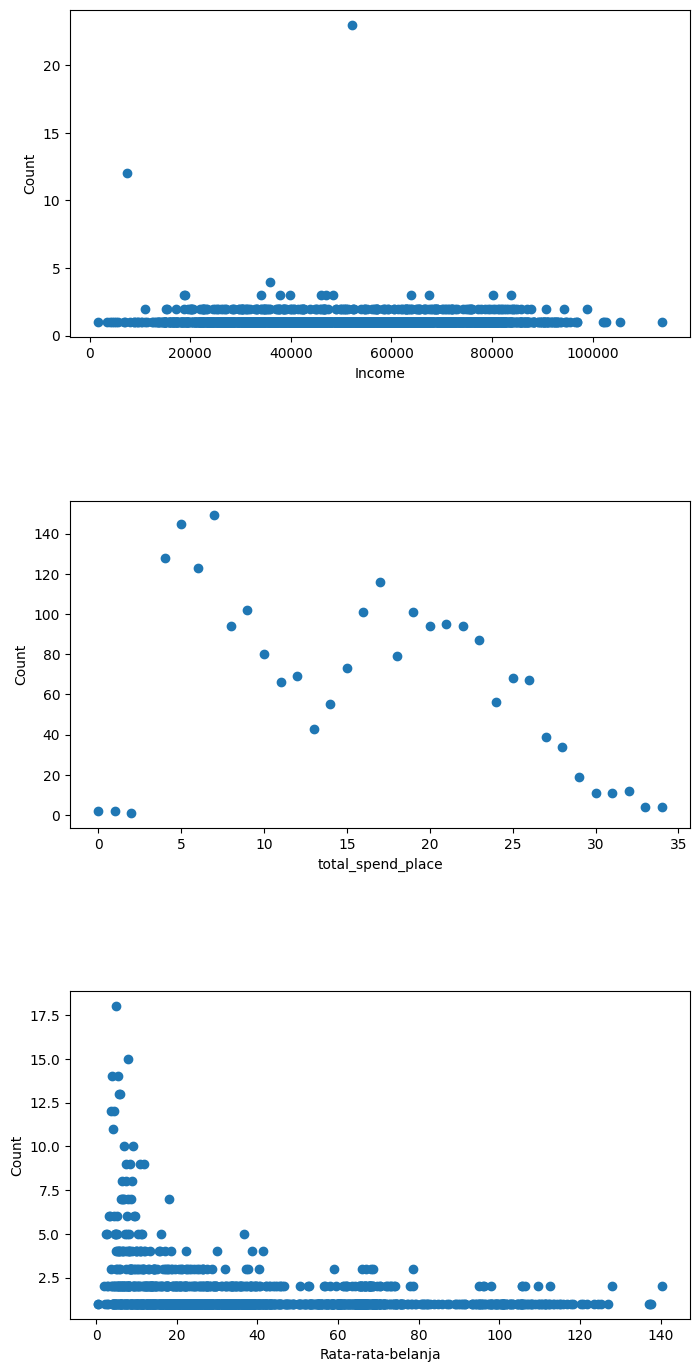

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(clean_df):
    counts = clean_df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

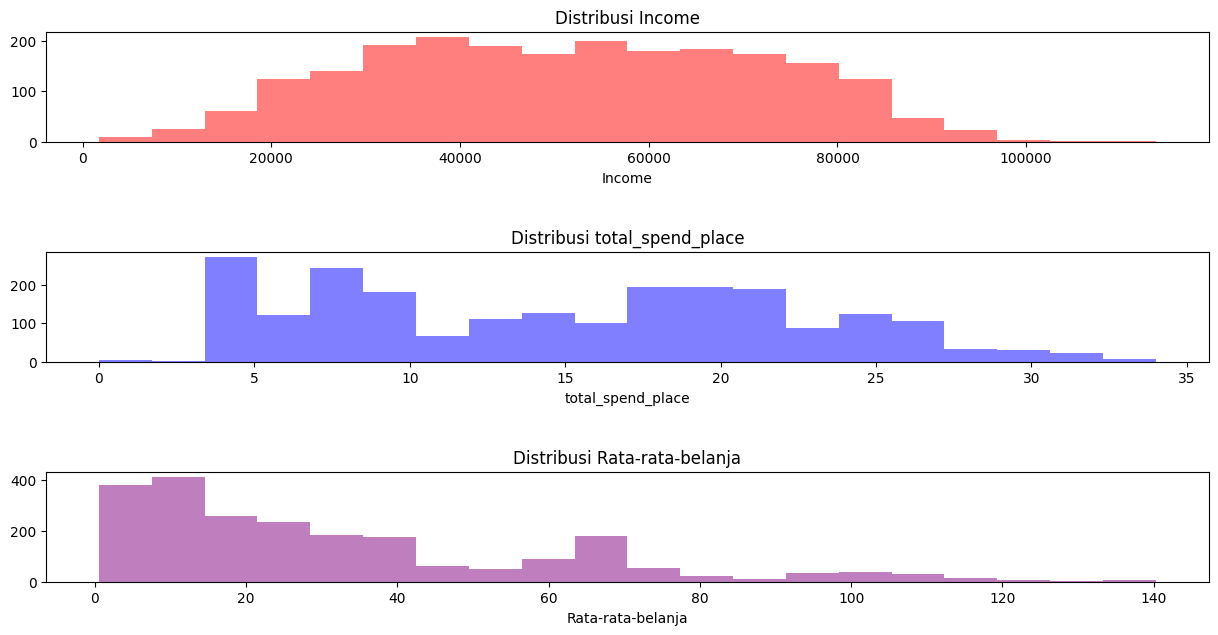

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(clean_df['Income'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Income')
plt.xlabel('Income')

plt.subplot(4, 1, 2)
plt.hist(clean_df['total_spend_place'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi total_spend_place')
plt.xlabel('total_spend_place')

plt.subplot(4, 1, 3)
plt.hist(clean_df['Rata-rata-belanja'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Rata-rata-belanja')
plt.xlabel('Rata-rata-belanja')

plt.subplots_adjust(hspace=1)  # Menambahkan jarak antar subplot secara vertikal

plt.show()


In [17]:
df = clean_df
df

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21
...,...,...,...
2235,61223.0,18,74.50
2236,64014.0,22,20.18
2237,56981.0,19,65.32
2238,69245.0,23,36.65


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah suatu pendekatan analisis data yang digunakan untuk memahami karakteristik utama dari dataset yang diberikan. Tujuan utama dari EDA adalah untuk mengungkapkan struktur dan pola dalam data melalui teknik visualisasi dan ringkasan statistik. Ini membantu analis data untuk memahami sifat-sifat intrinsik dari data, menemukan hubungan antara variabel, mengidentifikasi anomali atau pola menarik, dan merumuskan hipotesis yang mungkin untuk diuji lebih lanjut.

Beberapa teknik umum yang digunakan dalam EDA meliputi:
- Visualisasi data: seperti histogram, scatter plot, box plot, dan heatmaps untuk menampilkan distribusi, hubungan, dan pola dalam data.
- Statistik deskriptif: seperti mean, median, standar deviasi, dan persentil untuk memberikan ringkasan statistik tentang data.
- Analisis korelasi: untuk mengeksplorasi hubungan antara variabel menggunakan koefisien korelasi atau metode lainnya.
- Analisis frekuensi: untuk memahami distribusi dan frekuensi kemunculan nilai-nilai dalam variabel kategorikal.

EDA merupakan langkah awal yang penting dalam proses analisis data, karena membantu untuk mengidentifikasi pertanyaan yang relevan, menentukan metode analisis yang sesuai, dan menghasilkan wawasan awal yang dapat digunakan untuk pengambilan keputusan lebih lanjut.


**1. Feature Understanding**

Feature understanding adalah proses memahami variabel atau fitur (features) yang ada dalam dataset. Ini melibatkan pemahaman mendalam tentang setiap variabel, termasuk karakteristik, makna, dan pengaruhnya terhadap fenomena yang diamati.

In [18]:
df

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21
...,...,...,...
2235,61223.0,18,74.50
2236,64014.0,22,20.18
2237,56981.0,19,65.32
2238,69245.0,23,36.65


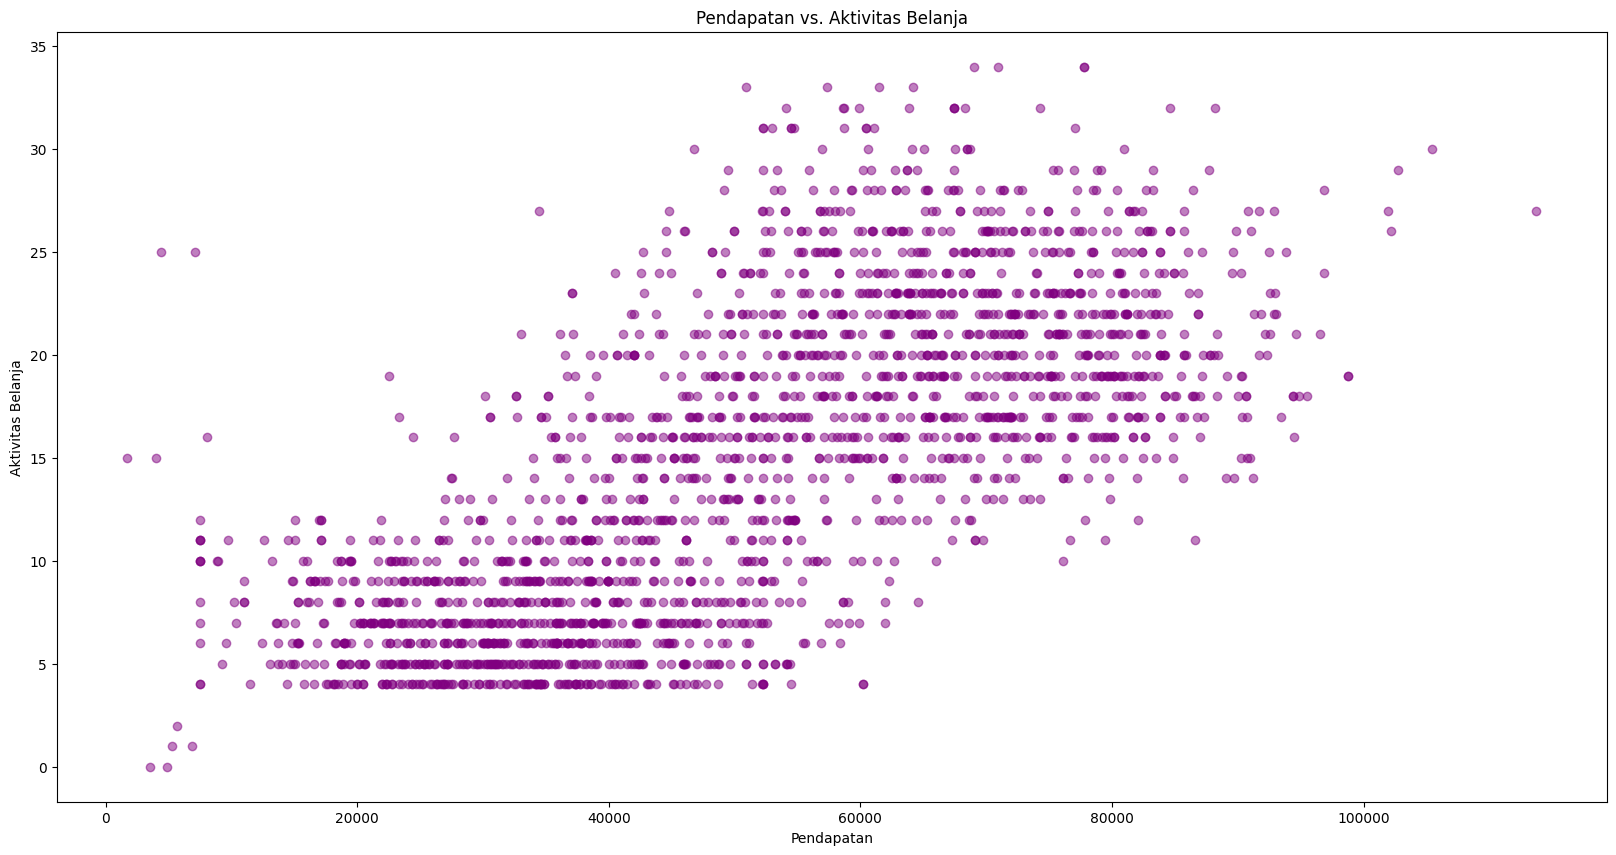

In [19]:
plt.figure(figsize=(20, 10))

plt.scatter(df['Income'], df['total_spend_place'], alpha=0.5, c='purple')
plt.title('Pendapatan vs. Aktivitas Belanja')
plt.xlabel('Pendapatan')
plt.ylabel('Aktivitas Belanja')
plt.show()

1. `plt.figure(figsize=(20, 10))`: Baris ini membuat gambar (figure) baru dengan ukuran 20x10 inci. Ini menyiapkan "canvas" di mana plot akan dibuat.

2. `plt.scatter(df['Income'], df['total_spend_place'], alpha=0.5, c='purple')`: Ini adalah perintah untuk membuat scatter plot. `df['Income']` adalah sumbu x, dan `df['total_spend_place']` adalah sumbu y. Setiap titik dalam plot ini akan mewakili pasangan nilai dari pendapatan dan total belanja di tempat tertentu. `alpha=0.5` mengatur transparansi titik menjadi setengah (50%), dan `c='purple'` mengatur warna titik menjadi ungu.

3. `plt.title('Pendapatan vs. Aktivitas Belanja')`: Ini memberikan judul untuk plot, dengan judul "Pendapatan vs. Aktivitas Belanja".

4. `plt.xlabel('Pendapatan')`: Ini memberi label sumbu x sebagai "Pendapatan".

5. `plt.ylabel('Aktivitas Belanja')`: Ini memberi label sumbu y sebagai "Aktivitas Belanja".

6. `plt.show()`: Ini menampilkan plot yang telah dibuat.

Grafik diatas menunjukkan perbandingan antara income buyer dengan frekuensi aktivitas belanja.

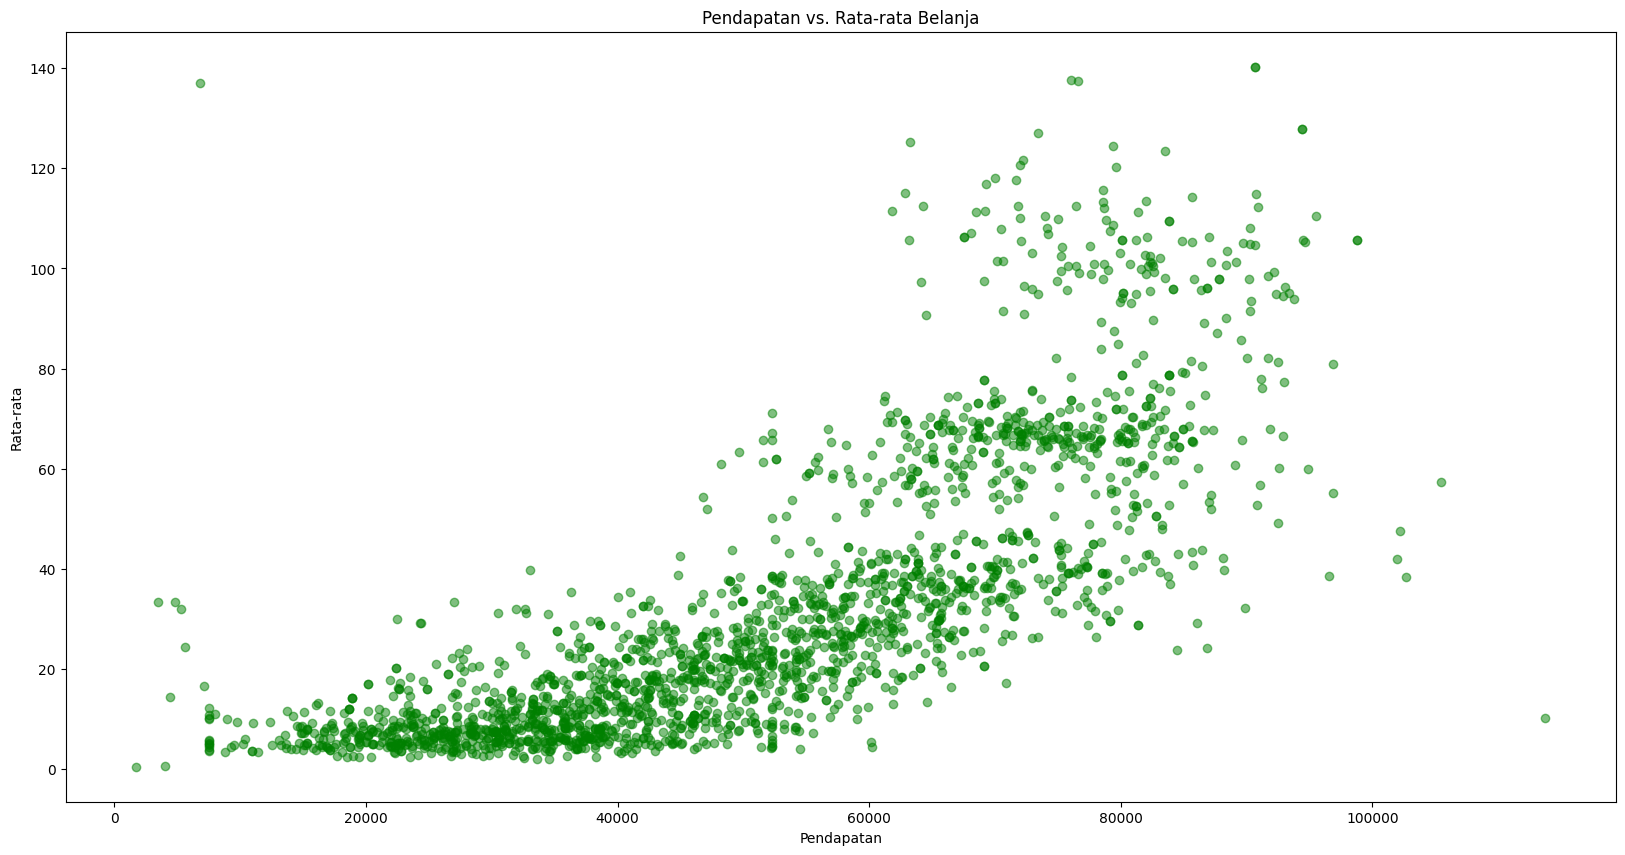

In [20]:
plt.figure(figsize=(20, 10))

plt.scatter(df['Income'], df['Rata-rata-belanja'], alpha=0.5, c='green')
plt.title('Pendapatan vs. Rata-rata Belanja')
plt.xlabel('Pendapatan')
plt.ylabel('Rata-rata')
plt.show()

1. `plt.figure(figsize=(20, 10))`: Ini adalah perintah untuk membuat sebuah gambar (figure) dengan ukuran 20x10 inci. Ini akan menjadi gambar di mana kita akan membuat plot data kita.

2. `plt.scatter(df['Income'], df['Rata-rata-belanja'], alpha=0.5, c='green')`: Di sini, kita menggunakan `plt.scatter` untuk membuat scatter plot. Kita menyediakan data untuk sumbu x dan y, yang diambil dari kolom 'Income' dan 'Rata-rata-belanja' dari dataframe `df`. Argumen `alpha=0.5` mengatur transparansi titik-titik scatter plot, sedangkan `c='green'` mengatur warna titik-titiknya menjadi hijau.

3. `plt.title('Pendapatan vs. Rata-rata Belanja')`: Ini menetapkan judul untuk plot kita, yaitu 'Pendapatan vs. Rata-rata Belanja'.

4. `plt.xlabel('Pendapatan')`: Ini menambahkan label sumbu x, yang diberi nama 'Pendapatan'. Ini membantu dalam memberikan informasi tentang apa yang diwakili oleh sumbu x.

5. `plt.ylabel('Rata-rata')`: Ini menambahkan label sumbu y, yang diberi nama 'Rata-rata'. Ini membantu dalam memberikan informasi tentang apa yang diwakili oleh sumbu y.

6. `plt.show()`: Perintah ini menampilkan plot yang telah kita buat. Setelah baris ini dieksekusi, Anda akan melihat plot scatter yang telah dibuat dengan judul dan label sumbu yang sesuai.

Dengan demikian, kode ini adalah untuk membuat sebuah scatter plot yang membandingkan pendapatan dengan rata-rata belanja dari data yang dimuat ke dalam dataframe `df`.

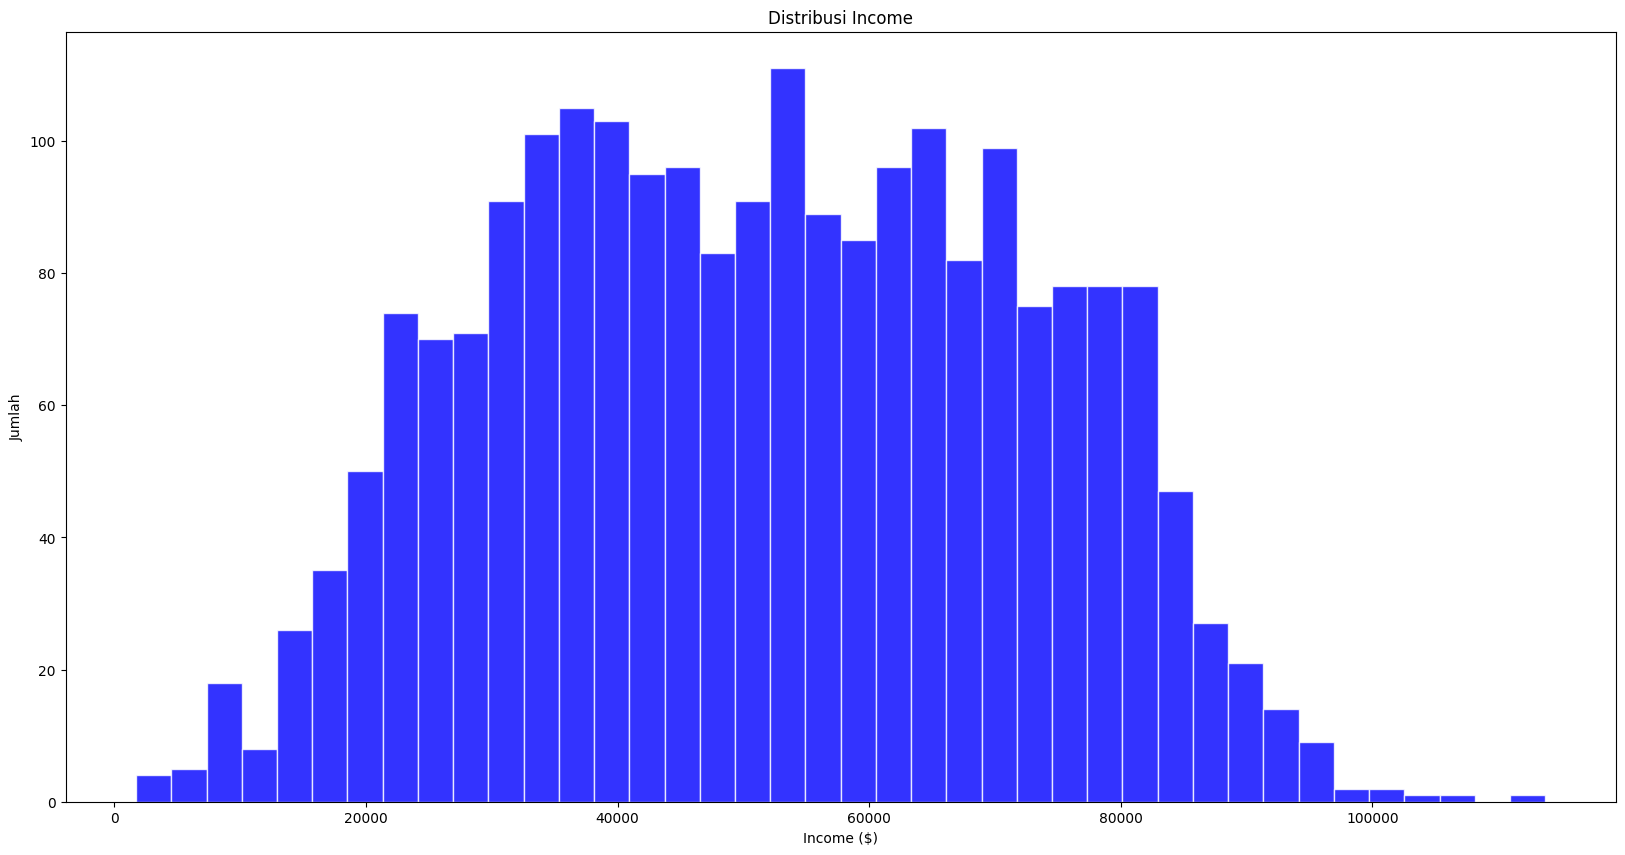

In [21]:
plt.figure(figsize=(20, 10))

plt.hist(df['Income'], alpha=0.8, bins=40, color='blue', edgecolor='white')
plt.title('Distribusi Income')
plt.xlabel('Income ($)')
plt.ylabel('Jumlah')
plt.show()

1. `plt.figure(figsize=(20, 10))`: Saya membuat sebuah gambar (figure) dengan ukuran 20x10 inci, di mana nanti saya akan membuat plot histogram.

2. `plt.hist(df['Income'], alpha=0.8, bins=40, color='blue', edgecolor='white', rwidth=10.0)`: Saya menggunakan `plt.hist()` untuk membuat histogram dari data pendapatan (kolom 'Income') yang diambil dari dataframe `df`. Parameter `alpha=0.8` mengatur transparansi histogram menjadi 80%. `bins=40` menetapkan jumlah bin (kelompok) data menjadi 40. Warna bar histogram diatur menjadi biru dengan `color='blue'`, dan tepi bar diberi warna putih dengan `edgecolor='white'`. Kemudian, saya menambahkan argumen `rwidth=10.0` untuk mengontrol lebar relatif dari setiap bar dalam histogram. Dengan nilai `rwidth=10.0`, lebar setiap bar akan menjadi 10.0, yang akan membuatnya saling tumpang tindih dan tidak memberikan tampilan yang baik pada plot.

3. `plt.title('Distribusi Income')`: Saya menambahkan judul ke plot histogram yang menggambarkan distribusi pendapatan.

4. `plt.xlabel('Income ($)')`: Saya memberikan label sumbu x sebagai "Income ($)", yang menjelaskan bahwa sumbu x mewakili data pendapatan dalam dolar.

5. `plt.ylabel('Jumlah')`: Saya memberikan label sumbu y sebagai "Jumlah", yang menjelaskan bahwa sumbu y mewakili jumlah frekuensi atau jumlah data.

6. `plt.show()`: Saya menampilkan plot histogram yang telah saya buat.


Dengan demikian, potongan kode tersebut menghasilkan histogram yang memvisualisasikan distribusi Income dalam dataset. Histogram ini membantu dalam pemahaman tentang sebaran Income dan frekuensi kemunculan nilai-nilai Income dalam data.

**2. Correlation Matrix**

Matriks korelasi adalah representasi visual dari hubungan antara variabel dalam sebuah dataset. Ini adalah tabel yang menunjukkan koefisien korelasi antara setiap pasangan variabel dalam dataset. Koefisien korelasi mengukur seberapa erat hubungan linier antara dua variabel, dengan nilai yang berkisar antara -1 hingga 1:

- Nilai 1 menunjukkan korelasi positif sempurna, yang berarti bahwa kedua variabel bergerak searah secara linier.
- Nilai -1 menunjukkan korelasi negatif sempurna, yang berarti bahwa kedua variabel bergerak berlawanan arah secara linier.
- Nilai 0 menunjukkan tidak adanya korelasi linier antara variabel, meskipun bisa saja ada hubungan non-linier.

Matriks korelasi biasanya disajikan dalam bentuk tabel persegi, di mana setiap sel diisi dengan koefisien korelasi antara dua variabel yang sesuai. Seringkali, matriks korelasi diwakili secara visual dengan warna, di mana nilai yang lebih tinggi atau lebih positif ditampilkan dengan warna yang lebih terang, sementara nilai yang lebih rendah atau lebih negatif ditampilkan dengan warna yang lebih gelap.

Matriks korelasi adalah alat yang berguna dalam analisis data karena membantu dalam mengidentifikasi hubungan antara variabel, memahami pola dalam data, dan menentukan variabel mana yang paling berpengaruh dalam menjelaskan variasi dalam dataset. Ini juga dapat digunakan untuk memilih variabel yang paling relevan dalam pemodelan statistik atau machine learning.

<Axes: >

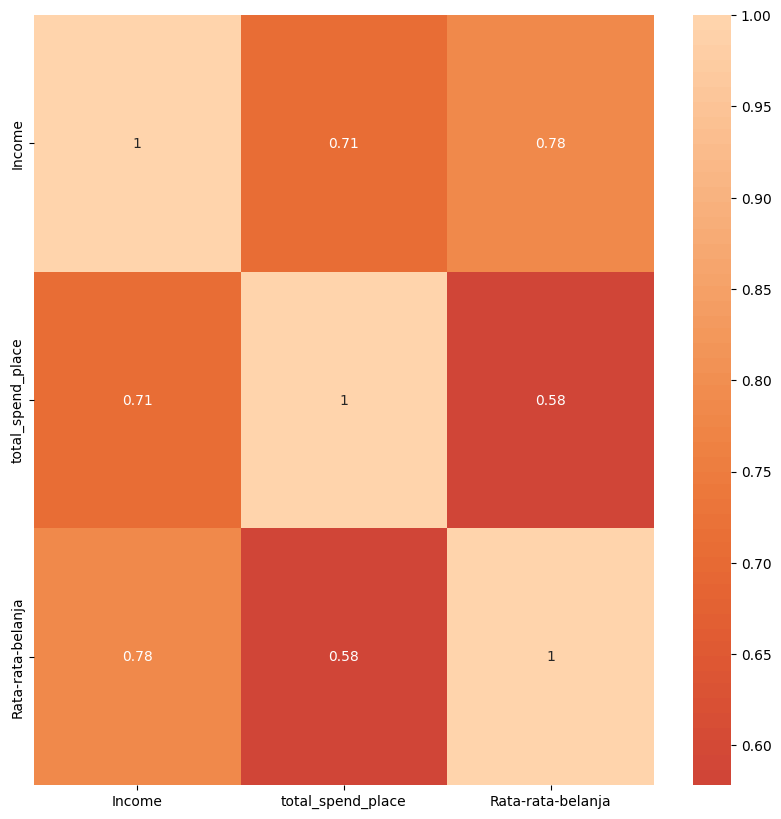

In [22]:
import seaborn as sns
corrmat= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, center=0)

Pada kode di atas, saya menggunakan library `seaborn` untuk membuat heatmap dari matriks korelasi antar kolom dalam DataFrame `df`.

Berikut adalah penjelasan langkah-langkahnya:

1. `corrmat = df.corr()`: Saya menggunakan metode `.corr()` pada DataFrame `df` untuk menghitung matriks korelasi antar kolom. Matriks korelasi ini berisi koefisien korelasi antar setiap pasang kolom dalam DataFrame.

2. `plt.figure(figsize=(10,10))`: Saya membuat figur dengan ukuran 10x10 menggunakan `plt.figure(figsize=(10,10))`. Hal ini bertujuan untuk menyesuaikan ukuran heatmap agar lebih mudah dibaca.

3. `sns.heatmap(corrmat, annot=True, center=0)`: Saya menggunakan fungsi `heatmap()` dari library `seaborn` untuk membuat heatmap dari matriks korelasi `corrmat`. Parameter `annot=True` digunakan untuk menampilkan nilai koefisien korelasi di dalam sel heatmap. Parameter `center=0` digunakan untuk menetapkan warna tengah heatmap pada nilai 0, sehingga memudahkan interpretasi korelasi positif dan negatif.

Dengan langkah-langkah di atas, saya berhasil membuat heatmap yang menunjukkan korelasi antar kolom dalam DataFrame `df`. heatmap ini memberikan visualisasi yang berguna untuk memahami hubungan antar variabel dalam dataset.

Berdasarkan nilai korelasi yang diberikan dari hasil visualisasi data:

1. Korelasi 0.78: Ini menunjukkan adanya hubungan positif yang cukup kuat antara kedua variabel tersebut. Meskipun tidak sempurna, hubungan ini masih dianggap cukup signifikan. Jika terdapat korelasi 0.78 antara dua variabel A dan B, maka ketika nilai A naik, kemungkinan besar nilai B juga akan naik, dan sebaliknya.

2. Korelasi 0.58: Ini juga menunjukkan adanya hubungan positif antara kedua variabel, tetapi hubungannya mungkin tidak sekuat korelasi sebelumnya (0.78). Meskipun demikian, masih terdapat hubungan yang signifikan di antara keduanya. Jika terdapat korelasi 0.58 antara dua variabel A dan B, maka terdapat kemungkinan bahwa perubahan dalam nilai A akan diikuti oleh perubahan dalam nilai B, tetapi hubungannya mungkin tidak sekuat korelasi 0.78.

3. Korelasi 1: Ini menunjukkan korelasi sempurna atau korelasi linier positif penuh. Hal ini menandakan bahwa kedua variabel memiliki hubungan linier positif yang sempurna. Artinya, jika terdapat korelasi 1 antara dua variabel A dan B, setiap perubahan dalam nilai A akan disertai oleh perubahan yang sama persis dalam nilai B. Ini menandakan hubungan yang sangat kuat di antara keduanya.

## **Hierarchical Clustring**

Hierarchical clustering adalah salah satu metode dalam analisis klaster (clustering) yang digunakan untuk mengelompokkan data ke dalam kelompok berdasarkan kemiripan mereka. Metode ini membangun hirarki dari klaster dengan berbagai tingkatan, di mana setiap data awal dimulai sebagai satu klaster sendiri dan kemudian digabungkan berdasarkan kemiripan mereka. Hierarchical clustering dapat dilakukan dalam dua cara: agglomerative (bottom-up) dan divisive (top-down). Namun, di sini saya akan menjelaskan secara khusus tentang pendekatan agglomerative karena lebih umum digunakan.

Berikut adalah langkah-langkah dalam hierarchical clustering secara detail:

1. **Inisialisasi Klaster**: Setiap titik data awal dianggap sebagai klaster tunggal. Jadi, jika kita memiliki n titik data, kita akan memiliki n klaster awal.

2. **Perhitungan Kemiripan**: Kemiripan antara klaster perlu dihitung. Kemiripan bisa diukur dengan berbagai metode, seperti jarak Euclidean, jarak Manhattan, korelasi, atau metode lainnya, tergantung pada jenis data dan kebutuhan analisis.

3. **Gabung Klaster**: Klaster yang memiliki kemiripan tertinggi akan digabungkan menjadi satu klaster baru. Proses ini dilakukan secara iteratif hingga semua titik data berada dalam satu klaster besar.

4. **Update Matriks Kemiripan**: Setelah penggabungan klaster, matriks kemiripan perlu diperbarui untuk mencerminkan perubahan klaster. Terkadang, ada metode yang memperbarui matriks kemiripan secara eksplisit, sementara metode lainnya memperbarui matriks secara implisit.

5. **Iterasi**: Langkah-langkah 2-4 diulang sampai hanya satu klaster besar yang tersisa, atau sampai kriteria penghentian tertentu tercapai. Kriteria penghentian bisa berupa jumlah klaster yang diinginkan, jarak antar klaster tertentu, atau peningkatan kemiripan yang tidak signifikan antar iterasi.

6. **Visualisasi Dendrogram**: Hasil akhir dari hierarchical clustering biasanya direpresentasikan dalam bentuk dendrogram. Dendrogram adalah diagram pohon yang menunjukkan bagaimana klaster digabungkan seiring berjalannya iterasi. Ini membantu dalam memahami struktur hirarki klaster yang dihasilkan.

Kelebihan dari hierarchical clustering adalah kemampuannya untuk memberikan struktur hirarkis yang lebih terstruktur dan dapat diinterpretasi. Namun, kerugiannya adalah kompleksitasnya yang cenderung tinggi, terutama saat menangani jumlah data yang besar, serta sensitivitas terhadap metrik jarak dan pemilihan jumlah klaster yang optimal.

In [23]:
df.head()

,Income,total_spend_place,Rata-rata-belanja
0,58138.0,25,64.68
1,46344.0,6,4.50
2,71613.0,21,36.95
3,26646.0,8,6.62
4,58293.0,19,22.21


In [24]:
from sklearn.preprocessing import StandardScaler
Normalisasi = StandardScaler().fit_transform(df)
Normalisasi


scaler = StandardScaler()

scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns= df.columns)
scaled_df.head()

,Income,total_spend_place,Rata-rata-belanja
0,0.317062,1.341690,1.156503
1,-0.257040,-1.167802,-0.993431
2,0.972992,0.813376,0.165847
3,-1.215889,-0.903645,-0.917694
4,0.324607,0.549219,-0.360740


1. **Pra-pemrosesan Data dengan StandardScaler**:
   
   Saya menggunakan `StandardScaler` dari pustaka scikit-learn untuk melakukan normalisasi data. Normalisasi adalah proses yang penting dalam analisis data untuk memastikan bahwa semua fitur memiliki skala yang serupa. Dalam hal ini, saya menggunakan metode standar normalisasi yang mengubah setiap fitur sehingga memiliki rata-rata nol dan standar deviasi satu.
   
   ```python
   from sklearn.preprocessing import StandardScaler
   Normalisasi = StandardScaler().fit_transform(df)
   Normalisasi
   ```
   
   Dengan menggunakan metode `fit_transform()` dari `StandardScaler`, saya mentransformasikan data `df` Anda ke dalam skala yang telah dinormalisasi. Hasil dari transformasi ini adalah array numpy yang berisi data yang sudah dinormalisasi.

2. **Normalisasi dengan Scikit-Learn dan Pembuatan DataFrame**:
   
   Saya juga melakukan normalisasi data `df` menggunakan `StandardScaler` dan kemudian mengubah hasil normalisasi ini menjadi DataFrame menggunakan pustaka pandas. Ini berguna karena seringkali kita perlu menjaga struktur data dalam bentuk DataFrame setelah normalisasi untuk keperluan analisis lebih lanjut.

   ```python
   scaler = StandardScaler()
   scaler.fit(df)
   scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
   scaled_df.head()
   ```
   
   Pertama, saya membuat objek `StandardScaler` dengan memanggil konstruktor kelas `StandardScaler()`. Kemudian, saya menggunakan metode `fit()` pada objek scaler ini untuk menghitung rata-rata dan standar deviasi dari setiap fitur dalam data `df`. Setelah itu, saya menggunakan metode `transform()` untuk melakukan normalisasi pada data `df`, dan mengubah hasil normalisasi ini menjadi DataFrame baru dengan nama kolom yang sama seperti data aslinya.

kode di atas untuk melakukan normalisasi data Anda agar sesuai dengan skala yang seragam, yang penting untuk mencegah fitur-fitur dengan skala yang lebih besar mendominasi dalam proses pembelajaran mesin. Normalisasi ini dapat membantu meningkatkan performa model machine learning Anda dengan memastikan bahwa setiap fitur diperlakukan secara merata. Selain itu, dengan mengubah hasil normalisasi ke dalam DataFrame, kita dapat terus menggunakan struktur data yang sudah kita kenali untuk analisis data lebih lanjut.

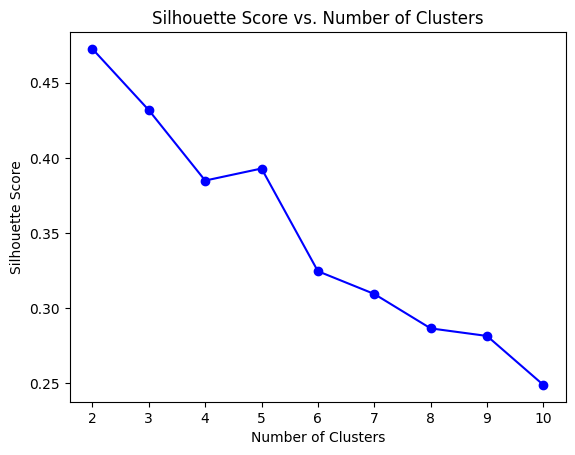

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score

cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(Normalisasi)
    silhouette_avg = silhouette_score(Normalisasi, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores,marker='o', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


Dalam kode di atas, saya menggunakan kelas `AgglomerativeClustering` dari modul `sklearn.cluster` untuk melakukan clustering hierarkis. Saya juga mengimpor fungsi `silhouette_score` dari `sklearn.metrics` untuk menghitung nilai Silhouette Score, yang merupakan metrik evaluasi yang berguna untuk mengevaluasi kualitas dari clustering yang saya hasilkan.

Saya mendefinisikan rentang jumlah klaster yang ingin saya evaluasi, mulai dari 2 hingga 10 (inklusif), dan membuat sebuah daftar kosong (`silhouette_scores`) untuk menyimpan nilai Silhouette Score untuk setiap jumlah klaster.

Kemudian, untuk setiap jumlah klaster dalam rentang yang telah saya tentukan sebelumnya, saya membuat sebuah objek `AgglomerativeClustering` dengan jumlah klaster yang sesuai. Saya kemudian menggunakan metode `fit_predict()` untuk melakukan clustering pada data yang sudah saya normalisasi (`Normalisasi`) dan mendapatkan label klaster untuk setiap sampel. Setelah itu, saya menghitung nilai rata-rata Silhouette Score untuk clustering yang saya hasilkan menggunakan fungsi `silhouette_score`, dan saya menyimpannya ke dalam daftar `silhouette_scores`.

Terakhir, saya membuat plot dari nilai Silhouette Score terhadap jumlah klaster menggunakan `matplotlib`. Label sumbu-x diberi judul 'Number of Clusters', label sumbu-y diberi judul 'Silhouette Score', dan judul plot diberi judul 'Silhouette Score vs. Number of Clusters'. Plot ini membantu saya memahami bagaimana nilai Silhouette Score berubah dengan jumlah klaster, dan membantu saya memilih jumlah klaster yang optimal berdasarkan pada nilai Silhouette Score tertinggi.

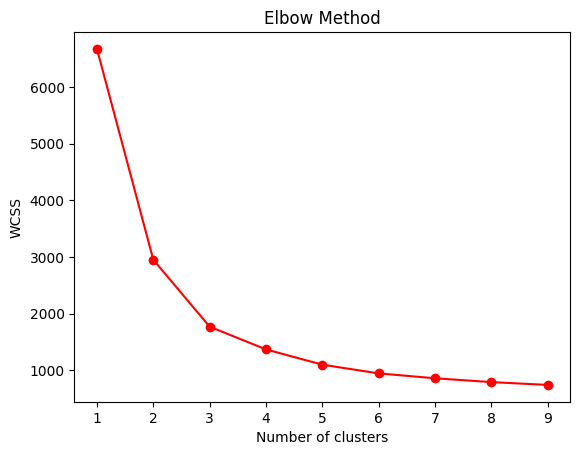

In [26]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=i)
    cluster_labels = hierarchical_clustering.fit_predict(Normalisasi)
    centroids = []
    for cluster_label in range(i):
        cluster_points = Normalisasi[cluster_labels == cluster_label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    wcss.append(np.sum((Normalisasi - np.array(centroids)[cluster_labels]) ** 2))

plt.plot(np.arange(1, 10), wcss, marker='o', color='red')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Dalam kode di atas, saya melakukan penghitungan Within-Cluster Sum of Squares (WCSS) untuk berbagai jumlah klaster menggunakan metode clustering aglomeratif. Berikut adalah langkah-langkahnya:

1. **Import Libraries**:
   Saya mengimpor modul `AgglomerativeClustering` dari pustaka `sklearn.cluster` untuk melakukan clustering hierarkis. Saya juga mengimpor `numpy` dan `matplotlib.pyplot` untuk manipulasi data numerik dan visualisasi data.

2. **Inisialisasi Variabel**:
   Saya membuat sebuah list kosong `wcss` yang akan digunakan untuk menyimpan nilai WCSS untuk setiap jumlah klaster yang dievaluasi.

3. **Iterasi Melalui Jumlah Klaster**:
   Saya melakukan iterasi dari 1 hingga 9 (inklusif) untuk berbagai jumlah klaster yang ingin dievaluasi.

4. **Clustering dan Perhitungan Centroid**:
   Untuk setiap jumlah klaster, saya membuat sebuah objek `AgglomerativeClustering` dengan jumlah klaster yang sesuai. Saya kemudian menggunakan metode `fit_predict()` untuk melakukan clustering pada data yang sudah dinormalisasi (`Normalisasi`) dan mendapatkan label klaster untuk setiap sampel. Setelah itu, saya menghitung centroid untuk setiap klaster dengan cara mencari rata-rata dari titik-titik dalam klaster tersebut.

5. **Perhitungan WCSS**:
   Saya menghitung nilai WCSS dengan menghitung jumlah kuadrat jarak antara setiap titik data dan centroid klaster yang sesuai. Saya kemudian menambahkan nilai WCSS ini ke dalam list `wcss`.

6. **Plotting Elbow Method**:
   Terakhir, saya membuat plot menggunakan `matplotlib.pyplot` yang menunjukkan bagaimana nilai WCSS berubah dengan jumlah klaster. Ini membantu saya dalam menentukan jumlah klaster yang optimal dengan melihat di mana titik "elbow" terletak, yaitu titik di mana penurunan WCSS menurun secara signifikan.

Dengan demikian, tujuan dari kode di atas adalah untuk menemukan jumlah klaster yang optimal dengan menggunakan metode Elbow dalam analisis clustering.

In [28]:
# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(Normalisasi))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_cluster.fit(scaled_df)


labels = agg_cluster.labels_
df['Cluster'] = labels
df.head()

,Income,total_spend_place,Rata-rata-belanja,Cluster
0,58138.0,25,64.68,0
1,46344.0,6,4.50,1
2,71613.0,21,36.95,0
3,26646.0,8,6.62,1
4,58293.0,19,22.21,0


```python
dist_matrix = squareform(pdist(Normalisasi))
```
Saya menggunakan fungsi `pdist` dari `scipy.spatial.distance` untuk menghitung matriks jarak pasangan antara sampel-sampel dalam data yang sudah dinormalisasi (`Normalisasi`). Fungsi `squareform` kemudian digunakan untuk mengonversi vektor jarak menjadi bentuk matriks.

```python
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_cluster.fit(scaled_df)
```
Saya membuat objek `AgglomerativeClustering` dengan jumlah klaster yang ditetapkan sebagai 2, dan kemudian menggunakan metode `fit()` untuk memasangkan model ke data yang sudah dinormalisasi (`scaled_df`).

```python
labels = agg_cluster.labels_
```
Saya mendapatkan label klaster untuk setiap sampel dari model clustering yang telah dilatih menggunakan atribut `labels_`.

```python
df['Cluster'] = labels
df.head()
```
Saya menambahkan kolom baru ke DataFrame `df` yang berisi label klaster untuk setiap sampel, dan kemudian menampilkan beberapa baris pertama dari DataFrame yang telah diperbarui.

Dengan demikian, tujuan dari kode di atas adalah untuk melakukan clustering aglomeratif pada data yang telah dinormalisasi dan menambahkan kolom klaster ke DataFrame untuk analisis lebih lanjut.

In [29]:
cluster_groups = df.groupby('Cluster')

cluster_statistics = cluster_groups.mean()

cluster_statistics

,Income,total_spend_place,Rata-rata-belanja
Cluster,,,
0,63703.018380,19.760727,46.730727
1,32062.623684,6.875147,8.948801


 tujuan dari kode di atas adalah untuk menghitung statistik rata-rata untuk setiap fitur dalam setiap kelompok klaster, sehingga saya dapat memahami perbedaan dalam pola fitur antara kelompok klaster yang berbeda.

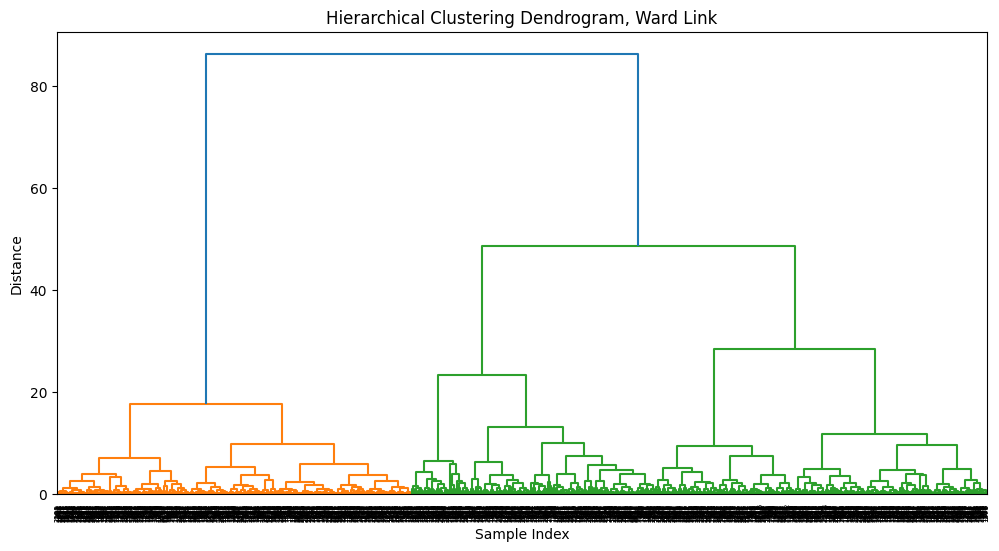

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(Normalisasi, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Ward Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

```python
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
```
Saya mengimpor fungsi `dendrogram` dan `linkage` dari modul `scipy.cluster.hierarchy` untuk menghasilkan dan menampilkan dendrogram. Saya juga mengimpor modul `matplotlib.pyplot` untuk membuat plot.

```python
# Compute the linkage matrix
Z = linkage(Normalisasi, method='ward')
```
Saya menggunakan fungsi `linkage` untuk menghitung matriks linkage dari data yang telah dinormalisasi (`Normalisasi`). Saya menggunakan metode ward, yang merupakan metode yang umum digunakan dalam hierarchical clustering untuk menghitung jarak antara cluster.

```python
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Ward Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
```
Saya membuat plot dari dendrogram menggunakan fungsi `dendrogram`. Parameter `Z` adalah matriks linkage yang telah dihitung sebelumnya. Saya menentukan judul plot, label sumbu-x (indeks sampel), dan label sumbu-y (jarak) untuk memberikan informasi tambahan tentang dendrogram. Terakhir, Saya menampilkan plot menggunakan `plt.show()`.

Dengan demikian, tujuan dari kode di atas adalah untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode ward untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

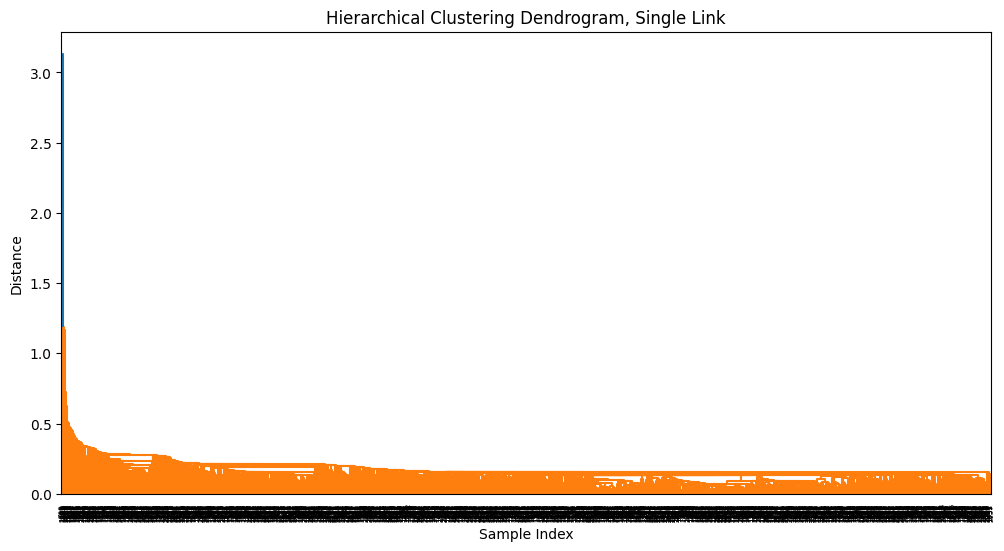

In [31]:
# Compute the linkage matrix
Z = linkage(Normalisasi, method='single')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Single Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Tujuan dari kode di atas adalah  hampir sama seperti kode sebelumnya yaitu untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode single link untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

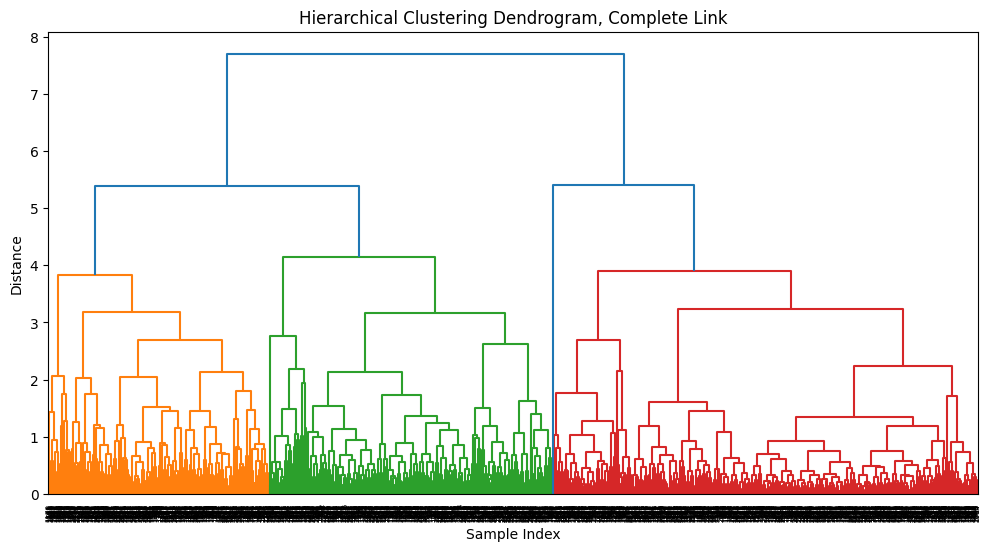

In [32]:
# Compute the linkage matrix
Z = linkage(Normalisasi, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Complete Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Tujuan dari kode di atas adalah  hampir sama seperti kode sebelumnya yaitu untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode Complete link untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

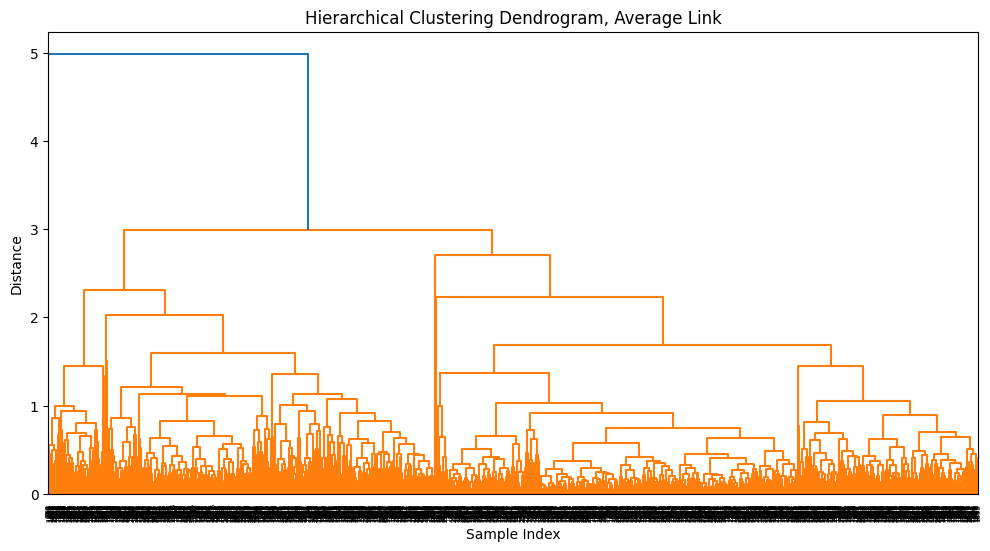

In [33]:
# Compute the linkage matrix
Z = linkage(Normalisasi, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Average Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Tujuan dari kode di atas adalah  hampir sama seperti kode sebelumnya yaitu untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode Average link untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

In [45]:
import plotly.graph_objs as go



df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]

# Definisikan data untuk garis
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
line_trace = go.Scatter3d(x=xline, y=yline, z=zline, mode='lines', line=dict(color='black'), name='Line')

# Definisikan data untuk setiap cluster
scatter_traces = [
    go.Scatter3d(x=df1.Income, y=df1.total_spend_place, z=df1['Rata-rata-belanja'], mode='markers',
                 marker=dict(color='blue', size=5), name='Client Biasa',
                 hovertemplate="<span>Income: %{x}<br>Total Spend Place: %{y}<br>Rata-rata Belanja: %{z}<extra></extra></span><span><b> Client Potensial </b><extra></extra></span>"),
    go.Scatter3d(x=df2.Income, y=df2.total_spend_place, z=df2['Rata-rata-belanja'], mode='markers',
                 marker=dict(color='red', size=5), name='Client Potential',
                hovertemplate="<span>Income: %{x}<br>Total Spend Place: %{y}<br>Rata-rata Belanja: %{z}<extra></extra></span><span><b> Client Biasa </b><extra></extra></span>"),
]



# Definisikan layout
layout = go.Layout(scene=dict(xaxis=dict(title='Pendapatan'), yaxis=dict(title='Kunjungan Tempat Belanja'), zaxis=dict(title='Rata-rata Belanja')),
                   margin=dict(l=0, r=0), height=800, width=800, title="Hasil K-Means", legend=dict(x=0, y=1), showlegend=True)

# Definisikan figure
fig = go.Figure(data=[line_trace] + scatter_traces , layout=layout)

# Tampilkan plot
fig.show()


```python
import plotly.graph_objs as go
```
<br>
Saya mengimpor modul `plotly.graph_objs` sebagai `go` untuk membuat plot menggunakan Plotly.
<br>

```python
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
```
<br>
Saya membagi DataFrame `df` menjadi dua DataFrame terpisah, `df1` dan `df2`, berdasarkan label klaster yang ditemukan sebelumnya.
<br>

```python
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
line_trace = go.Scatter3d(x=xline, y=yline, z=zline, mode='lines', line=dict(color='black'), name='Line')
```
<br>
Saya mendefinisikan garis 3D yang akan ditampilkan di plot.
<br>

```python
# Definisikan data untuk setiap cluster
scatter_traces = [
    go.Scatter3d(x=df1.Income, y=df1.total_spend_place, z=df1['Rata-rata-belanja'], mode='markers',
                 marker=dict(color='blue', size=5), name='Client Biasa',
                 hovertemplate="<span>Income: %{x}<br>Total Spend Place: %{y}<br>Rata-rata Belanja: %{z}<extra></extra></span><span><b> Client Potensial </b><extra></extra></span>"),
    go.Scatter3d(x=df2.Income, y=df2.total_spend_place, z=df2['Rata-rata-belanja'], mode='markers',
                 marker=dict(color='red', size=5), name='Client Potential',
                hovertemplate="<span>Income: %{x}<br>Total Spend Place: %{y}<br>Rata-rata Belanja: %{z}<extra></extra></span><span><b> Client Biasa </b><extra></extra></span>"),
]
```
<br>
Saya mendefinisikan dua kelompok data sebagai scatter plots 3D, satu untuk setiap kelompok klaster, menggunakan koordinat dari fitur-fitur yang ada di DataFrame `df1` dan `df2`.
<br>

```python
layout = go.Layout(scene=dict(xaxis=dict(title='Pendapatan'), yaxis=dict(title='Kunjungan Tempat Belanja'), zaxis=dict(title='Rata-rata Belanja')),
                   margin=dict(l=0, r=0), height=800, width=800, title="Hasil K-Means", legend=dict(x=0, y=1))
```
<br>
Saya mendefinisikan tata letak plot, termasuk label sumbu dan judul plot.

```python
fig = go.Figure(data=[line_trace] + scatter_traces , layout=layout)
```
<br>
Saya membuat objek `Figure` menggunakan garis dan plot scatter yang sudah didefinisikan sebelumnya, serta layout yang telah Saya atur.

```python
fig.show()
```
<br>

Saya menampilkan plot 3D menggunakan `fig.show()`.

Dengan demikian, tujuan dari kode di atas adalah untuk membuat plot 3D dari dua kelompok klaster yang ditemukan menggunakan Plotly. Plot ini memungkinkan Saya untuk memvisualisasikan pola dalam data dengan lebih baik, terutama ketika ada lebih dari dua fitur yang ingin Saya lihat secara bersamaan.

# **KESIMPULAN**

Dari hasil output dan visualisasi data 3d diatas, dapat disimpulkan bahwa : 

1. Cluster 1 - Client Potential
   - Memiliki Income yang lumayan sampai tinggi
   - Merupukan kumpulan orang yang suka shopping
   - Pengeluaran yang normal sampai tinggi untuk belanja
  
2. Cluster 2 - Client Biasa
   - Memiliki Income yang biasa dan cenderung rendah
   - Jarang keluar untuk belanja
   - Sedikit kurang dalam pengeluaran dalam belanja